# Logistic Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [3]:
Churn_data = pd.read_csv(r"C:\Users\ALMASRIA 4 COMP\Desktop\ML\Telco-Customer-Churn.csv")
Churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
Churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
Churn_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
Churn_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
Churn_selected = Churn_data[["gender","tenure","SeniorCitizen","PaymentMethod","MonthlyCharges","TotalCharges","Churn"]]

## Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder
gender_label_encoder = LabelEncoder()
gender_label_encoder.fit(["Male","Female"])
Churn_selected["gender"] = gender_label_encoder.transform(Churn_selected["gender"])


C:\Users\ALMASRIA 4 COMP\AppData\Local\Temp\ipykernel_11940\1484777252.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Churn_selected["gender"] = gender_label_encoder.transform(Churn_selected["gender"])


In [9]:
Churn_selected.head()

,gender,tenure,SeniorCitizen,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,Electronic check,29.85,29.85,No
1,1,34,0,Mailed check,56.95,1889.5,No
2,1,2,0,Mailed check,53.85,108.15,Yes
3,1,45,0,Bank transfer (automatic),42.30,1840.75,No
4,0,2,0,Electronic check,70.70,151.65,Yes


In [10]:
pay_method_encoder =LabelEncoder()
pay_method_encoder.fit(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'])

LabelEncoder()

In [11]:
Churn_selected["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [12]:
Churn_selected["PaymentMethod"] = pay_method_encoder.transform(Churn_selected["PaymentMethod"])

C:\Users\ALMASRIA 4 COMP\AppData\Local\Temp\ipykernel_11940\2980083313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Churn_selected["PaymentMethod"] = pay_method_encoder.transform(Churn_selected["PaymentMethod"])


In [13]:
Churn_selected.dtypes

gender              int32
tenure              int64
SeniorCitizen       int64
PaymentMethod       int32
MonthlyCharges    float64
TotalCharges       object
Churn              object
dtype: object

In [14]:
Churn_selected["TotalCharges"].replace(" ","0",inplace=True)

C:\Users\ALMASRIA 4 COMP\AppData\Local\Temp\ipykernel_11940\672304931.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Churn_selected["TotalCharges"].replace(" ","0",inplace=True)
C:\Users\ALMASRIA 4 COMP\AppData\Local\Temp\ipykernel_11940\672304931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Churn_selected["TotalCharges"].replace("

In [15]:
Churn_selected["TotalCharges"] = Churn_selected["TotalCharges"].astype('float64')

C:\Users\ALMASRIA 4 COMP\AppData\Local\Temp\ipykernel_11940\3757446256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Churn_selected["TotalCharges"] = Churn_selected["TotalCharges"].astype('float64')


In [16]:
Churn_selected["TechSupport"] =LabelEncoder().fit(["TechSupport"]).transform(Churn_selected["TechSupport"])

KeyError: 'TechSupport'

In [ ]:
Churn_selected["TechSupport"].unique()

KeyError: 'TechSupport'

## Train Test Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=7,shuffle=True)

In [ ]:
X_train.dtype

dtype('float64')

In [ ]:
X_test.shape

(2325, 6)

c:\Users\Yahia\.conda\envs\first_model_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


lbfgs:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1686
           1       0.67      0.47      0.55       639

    accuracy                           0.79      2325
   macro avg       0.75      0.69      0.71      2325
weighted avg       0.78      0.79      0.78      2325

liblinear:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1686
           1       0.66      0.46      0.54       639

    accuracy                           0.79      2325
   macro avg       0.74      0.68      0.70      2325
weighted avg       0.77      0.79      0.77      2325

newton-cg:
              precision    recall  f1-score   support

           0       0.82      0.92      0.86      1686
           1       0.68      0.45      0.54       639

    accuracy                           0.79      2325
   macro avg       0.75      0.69      0.70      2325
weighted avg       0.78      0.79      0.78  

c:\Users\Yahia\.conda\envs\first_model_gpu\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Yahia\.conda\envs\first_model_gpu\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


saga:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1686
           1       0.58      0.49      0.53       639

    accuracy                           0.76      2325
   macro avg       0.70      0.68      0.69      2325
weighted avg       0.75      0.76      0.76      2325



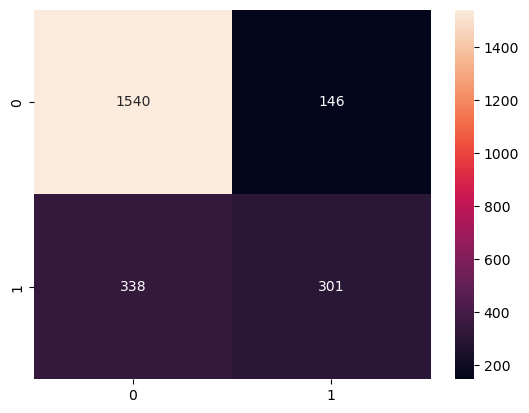

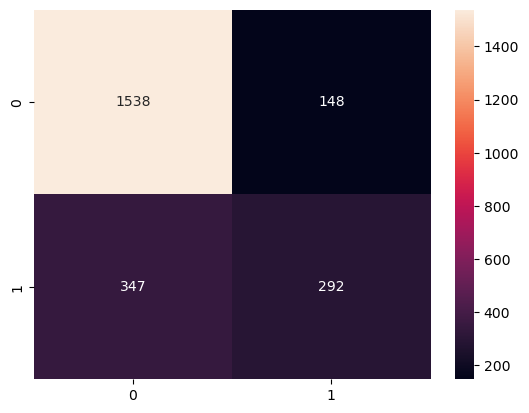

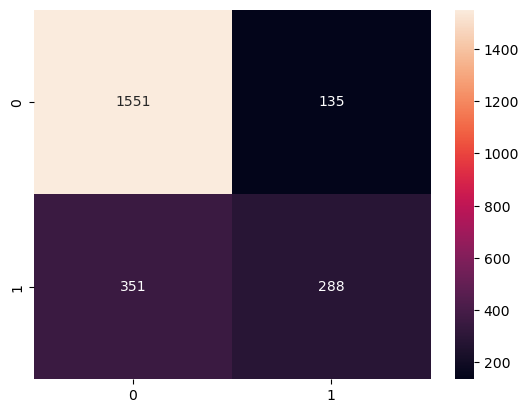

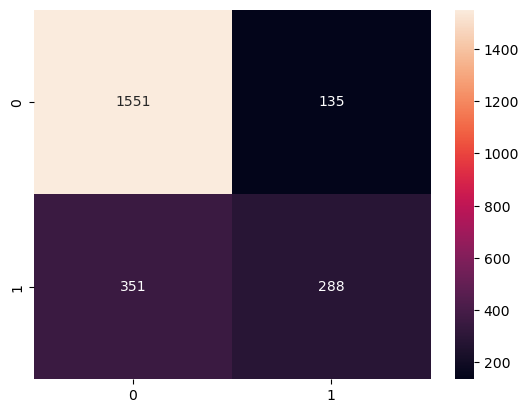

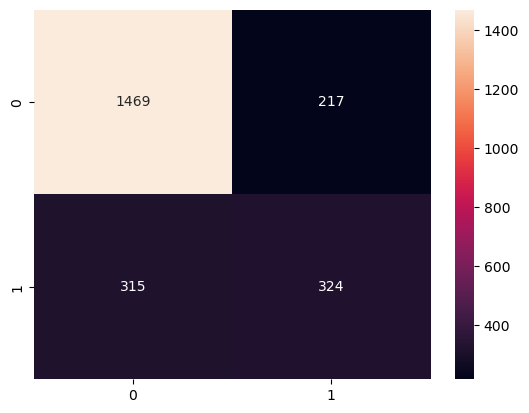

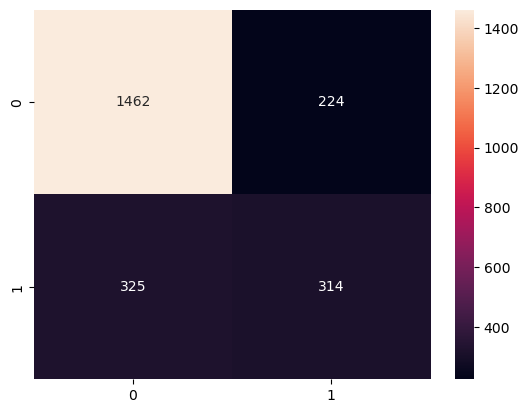

In [ ]:
from sklearn.linear_model import LogisticRegression 
solver_list = ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]

for solver in solver_list:
    LR_model = LogisticRegression(solver=solver)
    LR_model.fit(X_train,y_train)
    predictions = LR_model.predict(X_test)
    predictions_probabilty = LR_model.predict_proba(X_test)
    cf_matrix = confusion_matrix(y_test, predictions)
    plt.figure()
    sns.heatmap(cf_matrix, annot=True, fmt=".0f")
    csr= classification_report(y_test,predictions)
    print(f"{solver}:")
    print(csr)

In [ ]:
for O in np.range(0.001,1.1,0.1):
    LR_model = LogisticRegression(C=O)
    LR_model.fit(X_train,y_train)
    predictions = LR_model.predict(X_test)
    predictions_probabilty = LR_model.predict_proba(X_test)
    cf_matrix = confusion_matrix(y_test, predictions)
    plt.figure()
    sns.heatmap(cf_matrix, annot=True, fmt=".0f")
    csr= classification_report(y_test,predictions)
    print(f"{solver}:")
    print(csr)

AttributeError: module 'numpy' has no attribute 'range'

In [ ]:
predictions = LR_model.predict(X_test)
print(predictions[100:105])
print(y_test[100:105])

[0 1 0 1 0]
[0 0 1 1 0]


In [ ]:
predictions_probabilty = LR_model.predict_proba(X_test)
predictions_probabilty

array([[0.85458092, 0.14541908],
       [0.39025261, 0.60974739],
       [0.35958639, 0.64041361],
       ...,
       [0.77173592, 0.22826408],
       [0.80948324, 0.19051676],
       [0.98469221, 0.01530779]])

## Metrics Evalution 

In [ ]:
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: >

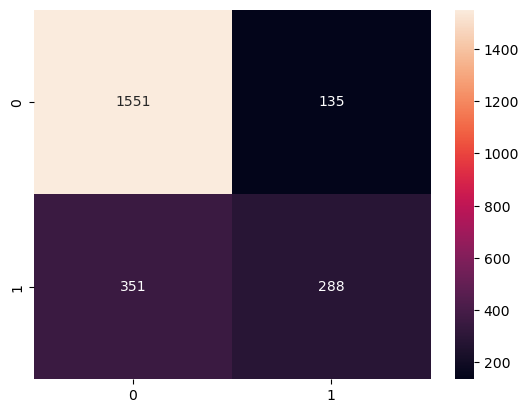

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix, annot=True, fmt=".0f")

In [ ]:
from sklearn.metrics import classification_report
csr= classification_report(y_test,predictions)
print(csr)


              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1686
           1       0.66      0.46      0.54       639

    accuracy                           0.79      2325
   macro avg       0.74      0.68      0.70      2325
weighted avg       0.77      0.79      0.77      2325



In [ ]:
from sklearn.metrics import log_loss
log_loss(y_test,predictions_probabilty)

In [ ]:
from sklearn.metrics import jaccard_score



## Try with yourself
try  different optimizer and regulariztion 

## Normalization effect

In [ ]:
X = np.asarray(Churn_selected[["tenure","SeniorCitizen","PhoneService","InternetService","OnlineSecurity","TechSupport","PaymentMethod","MonthlyCharges","TotalCharges"]])
X[0:4]

In [ ]:
y = np.asarray(Churn_selected['Churn'])
y[0:4]

In [ ]:
from sklearn.preprocessing import StandardScaler
X_norm = StandardScaler().fit(X).transform(X)
X_norm

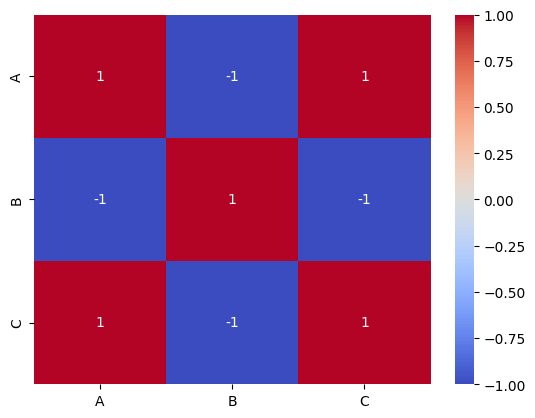

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [5, 4, 3, 2, 1],
    'C': [2, 3, 4, 5, 6]
})
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       1   19                  15                      39
1           2       1   21                  15                      81
2           3       0   20                  16                       6
3           4       0   23                  16                      77
4           5       0   31                  17                      40


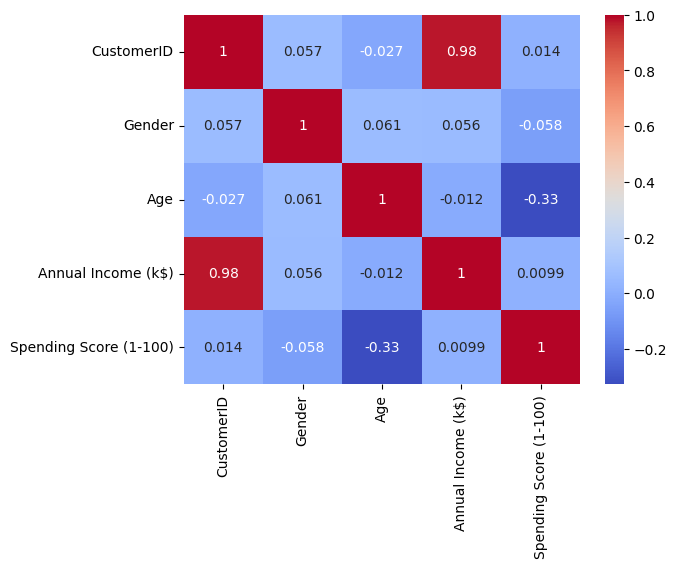

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv(r'C:\Users\ALMASRIA 4 COMP\Desktop\ML\Mall_Customers.csv')
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

print(data.head())

corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
